In [8]:
import pandas as pd
import tushare as ts#ABC
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import cufflinks as cf
import plotly.offline as plyo
sns.set()
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'

In [9]:
ts.set_token('36edcbf4f0f39791466df6aa78b8602b50985638532710659cc35754')
pro = ts.pro_api('36edcbf4f0f39791466df6aa78b8602b50985638532710659cc35754')

In [86]:
wanke = pro.daily(ts_code='000002.SZ', start_date='20170101')
pingan = pro.daily(ts_code='601318.SH', start_date='20170101')
maotai = pro.daily(ts_code='600519.SH', start_date='20170101')
wanhua = pro.daily(ts_code='002415.SZ', start_date='20170101')
NHGS = pro.daily(ts_code='600377.SH', start_date='20170101')
yili = pro.daily(ts_code='600887.SH', start_date='20170101')
hs300 = pro.index_daily(ts_code='000300.SH', start_date='20170101')

# 仅保留收益率数据，且用日期作为index
# 然后按照日期排序（增序）
stock_list = [wanke, pingan, maotai, wanhua, NHGS, yili, hs300]
for stock in stock_list:
    stock.index = pd.to_datetime(stock.trade_date)
df = pd.concat([stock.pct_chg / 100 for stock in stock_list], axis=1)
df.columns = ['wanke', 'pingan', 'maotai', 'wanhua', 'NHGS', 'yili', 'hs300']
df = df.sort_index(ascending=True)
df.describe()

,wanke,pingan,maotai,wanhua,NHGS,yili,hs300
count,610.000000,615.000000,615.000000,615.000000,615.000000,611.000000,615.000000
mean,0.001018,0.001777,0.002038,0.001262,0.000576,0.001427,0.000298
std,0.024587,0.018976,0.020314,0.025104,0.009728,0.021267,0.011782
min,-0.092593,-0.066100,-0.100000,-0.099861,-0.038000,-0.100000,-0.058416
25%,-0.011687,-0.008900,-0.009413,-0.012932,-0.004950,-0.010669,-0.005265
50%,-0.000758,0.001230,0.000300,0.000600,0.000000,0.000800,0.000277
75%,0.010764,0.011568,0.013327,0.015323,0.006150,0.012450,0.005607
max,0.100100,0.089227,0.082100,0.100157,0.039216,0.099600,0.059477


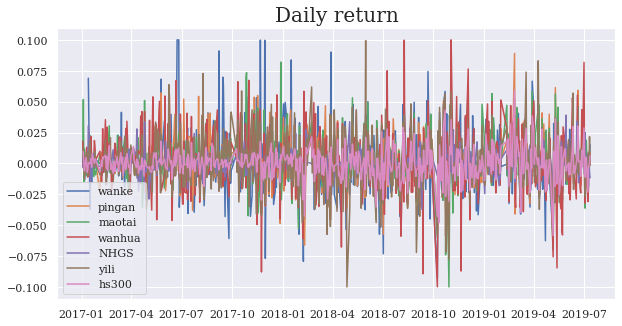

In [87]:
plt.figure(figsize=(10, 5))
for col in df.columns:
    plt.plot(df[col], label=col)
plt.title('Daily return', fontsize=20)
plt.legend()

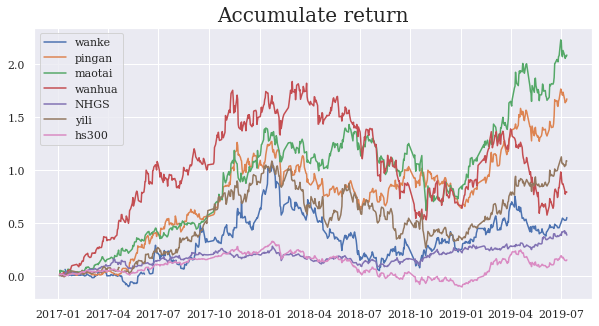

In [88]:
plt.figure(figsize=(10, 5))
for col in df.columns:
    plt.plot((df[col]+1).cumprod()-1, label=col)
plt.title('Accumulate return', fontsize=20)
plt.legend()

In [89]:
plyo.init_notebook_mode(connected=True)
plyo.iplot(
     df.iplot(asFigure=True,
              theme='polar',
              title='Daily return',
              xTitle='date',
              yTitle='value'),
# image='png',
filename='CAPM_02')

In [90]:
df1 = []
for col in df.columns:
    a = ((df[col]+1).cumprod()-1)
    df1.append(a)

df2_T = pd.DataFrame(df1)
df2 = df2_T.T
df2.tail()

,wanke,pingan,maotai,wanhua,NHGS,yili,hs300
trade_date,,,,,,,
2019-07-08,0.524040,1.664577,2.078968,0.810837,0.426242,1.030788,0.148853
2019-07-09,0.524040,1.632695,2.051458,0.770345,0.399332,1.048645,0.145935
2019-07-10,0.525086,1.643223,2.071652,0.786941,0.410865,1.041872,0.144004
2019-07-11,0.527177,1.646231,2.068464,0.792914,0.400614,1.086207,0.143545
2019-07-12,0.550181,1.669391,2.082815,0.790259,0.384561,1.083128,0.150648


In [91]:
df2.to_csv('df2.csv')

In [102]:
plyo.iplot(df2.iplot(asFigure=True,
           theme='solar',
           title='Accumculate return',
           xTitle='Dates',
           yTitle='Return'),
# image='png',
filename='CAPM_02'
)

In [25]:
rf = 1.0254 ** (1/360) - 1
rf

6.967681722636065e-05

In [109]:
df_rp = df - rf
df_rp.head()

,wanke,pingan,maotai,wanhua,NHGS,yili,hs300
trade_date,,,,,,,
2017-01-03,0.00873,0.00703,0.00113,0.01803,0.00693,0.00503,0.009642
2017-01-04,0.00573,-0.00087,0.05183,-0.00337,-0.00357,0.01183,0.007735
2017-01-05,0.00373,0.00213,-0.01477,0.00573,0.00223,-0.00117,-0.000225
2017-01-06,-0.01397,-0.00817,0.01153,-0.00827,-0.00477,-0.01297,-0.006045
2017-01-09,0.00093,-0.00067,-0.00647,0.00653,0.00113,0.00103,0.004780


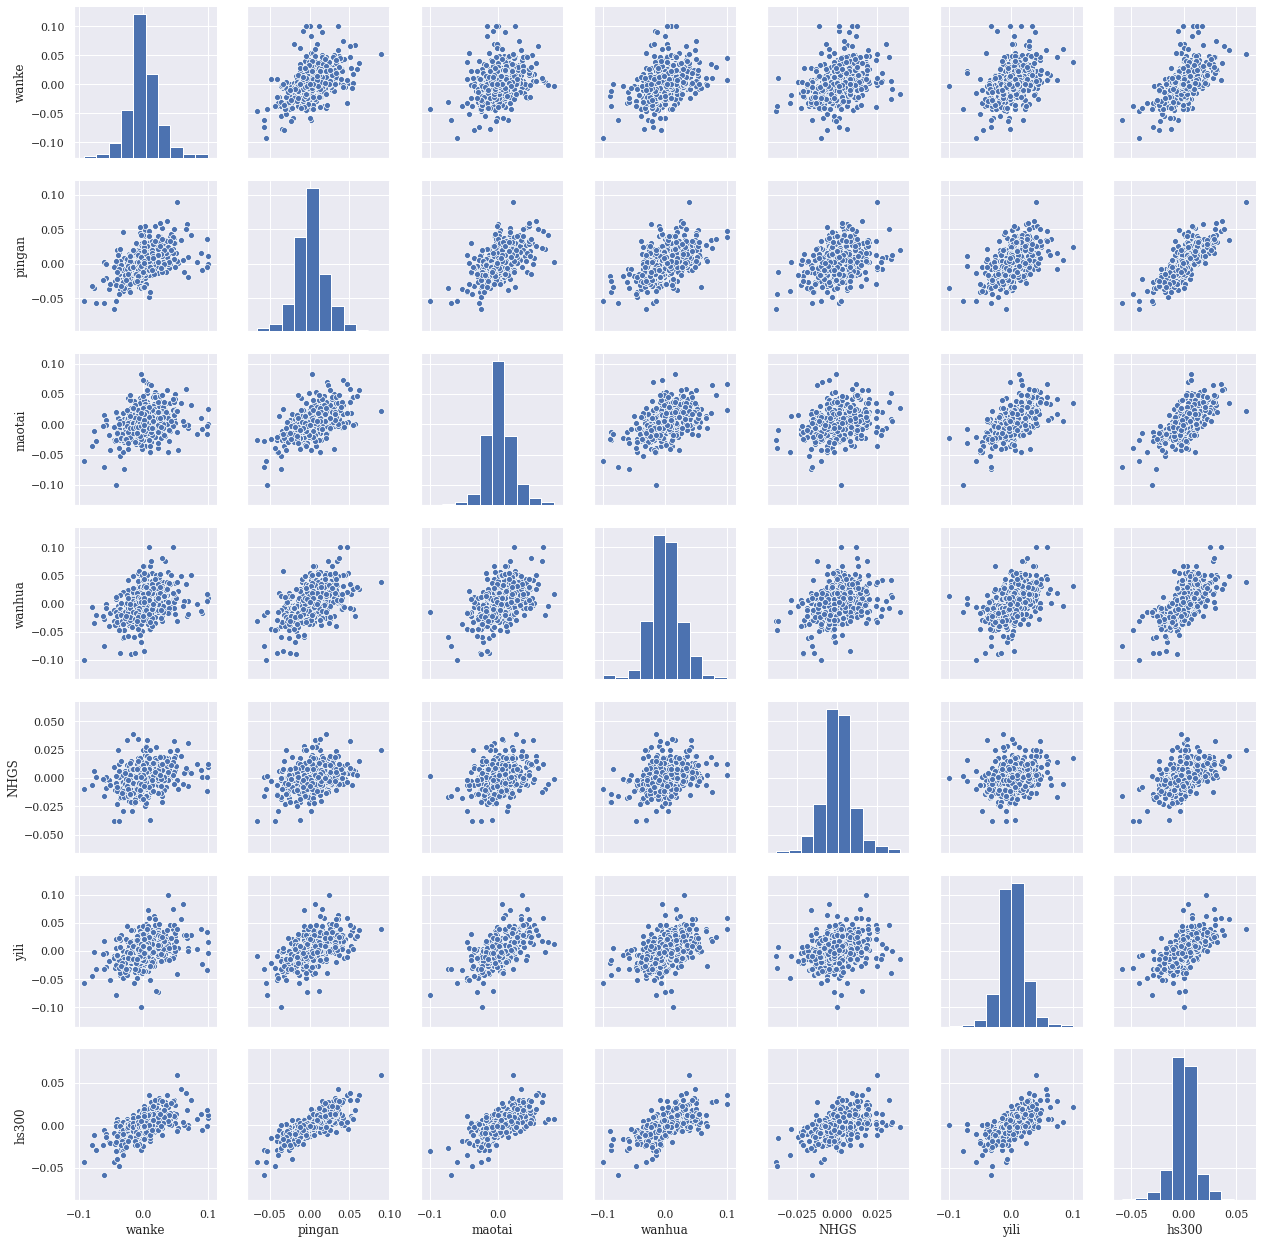

In [110]:
sns.pairplot(df_rp)

In [104]:
import statsmodels.api as sm

In [112]:
stock_names = {
    'wanke': '万科A',
    'pingan': '中国平安',
    'maotai': '贵州茅台',
    'wanhua': '万华化学',
    'NHGS': '宁沪高速',
    'yili': '伊利股份'
}
for stock in ['wanke', 'pingan', 'maotai', 'wanhua', 'NHGS', 'yili']:
    model = sm.OLS(df_rp[stock], sm.add_constant(df_rp['hs300']))
    result = model.fit()
    print(stock_names[stock] + '\n')
    print(result.summary())
    print('\n\n')

万科A

                            OLS Regression Results                            
Dep. Variable:                  wanke   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 13 Jul 2019   Prob (F-statistic):                nan
Time:                        11:18:27   Log-Likelihood:                    nan
No. Observations:                 615   AIC:                               nan
Df Residuals:                     613   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan    